In [1]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# 0. Preprocess + EDA + Feature Selection

In [4]:
df.shape

(100, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [6]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA 

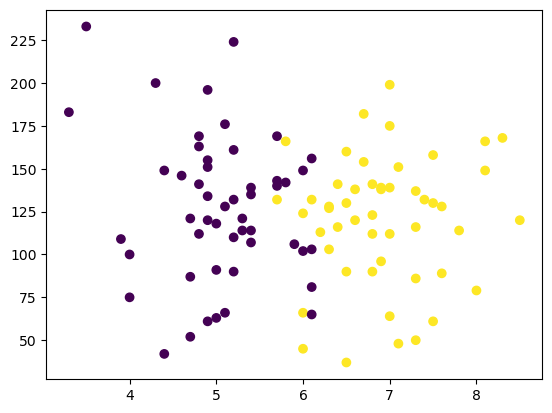

In [7]:
plt.scatter(df.cgpa, df.iq, c=df.placement)

# Extract input and output cols

In [8]:
X = df.drop(columns=['placement'],axis=1)
y = df.placement

In [9]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [10]:
y.shape

(100,)

# Train test split

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.1)

In [12]:
Xtrain.head()

,cgpa,iq
93,6.8,112.0
23,4.7,87.0
25,5.0,91.0
61,7.3,137.0
0,6.8,123.0


In [13]:
Xtrain.shape

(90, 2)

In [14]:
ytrain.head()

93    1
23    0
25    0
61    1
0     1
Name: placement, dtype: int64

In [15]:
ytrain.shape

(90,)

In [16]:
Xtest

,cgpa,iq
1,5.9,106.0
37,8.1,149.0
15,5.1,176.0
7,5.0,63.0
35,6.8,90.0
13,6.4,116.0
77,7.3,50.0
3,7.4,132.0
9,5.1,66.0
31,3.9,109.0


# Scale the values

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
Xtrain = scaler.fit_transform(Xtrain)

In [20]:
Xtrain

array([[ 0.73102096, -0.34393835],
       [-1.13857256, -0.97773139],
       [-0.87148777, -0.8763245 ],
       [ 1.17616227,  0.28985468],
       [ 0.73102096, -0.06506942],
       [-0.24828993,  0.44196501],
       [ 0.90907748,  0.34055812],
       [ 1.35421879, -1.63687615],
       [-1.7617704 , -0.64815901],
       [ 2.24450142, -0.14112458],
       [ 0.90907748,  1.2532201 ],
       [ 0.99810574,  0.64477878],
       [ 0.46393617,  0.87294427],
       [ 0.01879486, -1.51011754],
       [-0.69343125,  2.49545444],
       [-0.96051603,  0.74618567],
       [ 1.35421879,  0.11239263],
       [-0.15926167,  0.41661329],
       [ 0.28587964,  0.06168919],
       [ 0.73102096,  0.39126157],
       [-0.69343125, -0.3946418 ],
       [ 1.35421879,  0.82224083],
       [ 0.82004922, -0.7495659 ],
       [ 0.28587964, -0.57210385],
       [ 0.10782312,  0.16309607],
       [ 1.88838837,  1.0250546 ],
       [-0.24828993,  1.10110977],
       [-0.96051603,  1.78560624],
       [ 2.06644489,

In [21]:
Xtest = scaler.transform(Xtest)
Xtest

array([[-0.07023341, -0.49604868],
       [ 1.88838837,  0.59407534],
       [-0.78245951,  1.27857182],
       [-0.87148777, -1.5861727 ],
       [ 0.73102096, -0.90167622],
       [ 0.37490791, -0.24253147],
       [ 1.17616227, -1.91574508],
       [ 1.26519053,  0.16309607],
       [-0.78245951, -1.51011754],
       [-1.85079866, -0.41999352]])

# Evaluate the model/model selection

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [23]:
clf.fit(Xtrain, ytrain)

LogisticRegression()

In [24]:
ypred_train = clf.predict(Xtrain)
ypred_train

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [25]:
ypred = clf.predict(Xtest)
ypred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [26]:
ytest

1     0
37    1
15    0
7     0
35    1
13    1
77    1
3     1
9     0
31    0
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(ytest, ypred)

1.0

In [29]:
accuracy_score(ytrain, ypred_train)

0.9111111111111111

In [30]:
from mlxtend.plotting import plot_decision_regions as pdr

<Axes: >

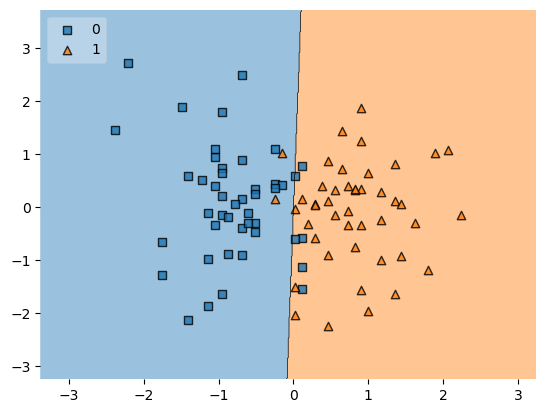

In [31]:
pdr(Xtrain, ytrain.values, clf=clf, legend=2)

# Deploy the model

In [32]:
import pickle

In [33]:
pickle.dump(clf, open('1.2 model.pkl','wb'))